In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

###### Load the dataset

In [2]:
dataset = pd.read_csv(r"d:\Users\NAME\Desktop\INNOMATICS\ASRA GITHUB - ML\Sentiment Analysis\Restaurant_Reviews.tsv", delimiter = "\t")

In [3]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


#### Text PreProcessing

In [4]:
import re

In [5]:
review = dataset["Review"][0]

In [6]:
review

'Wow... Loved this place.'

##### Removing the unwanted puncuations

In [7]:
re_punt = "[^A-Za-z0-9!?\s]"

In [8]:
review = re.sub(re_punt, "",review)

In [9]:
review

'Wow Loved this place'

### Normalising the case

In [10]:
# To avoid duplicates, we normalize the case of words

review = review.lower()

In [11]:
review

'wow loved this place'

In [12]:
import nltk

In [13]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
nltk.__version__

'3.7'

In [15]:
#corpus= group of sentences 
from nltk.corpus import stopwords

In [16]:
nltk.corpus.names

<WordListCorpusReader in '.../corpora/names' (not loaded yet)>

In [17]:
sw_list = stopwords.words("english")

#sw_list = stopwords.words("hindi")
#sw_list = stopwords.words("arabic"), etc....any language

In [18]:
sw_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
review

'wow loved this place'

In [20]:
# ---> you need to modify the stop words list according to ur use

### Tokenization

In [21]:
# Tokenization: --- to split text into words
#               --- to give a number to each word

In [22]:
review = review.split()

In [23]:
review

['wow', 'loved', 'this', 'place']

### Removing the stop words

In [25]:
# Removing the stop words from the review

#Method 1: simple code
# /* temp_review = review.copy()
# for word in temp_review:
#    if word in sw_list:
#        review.remove(word) */ 


#Method 2: using list comprehension (faster)
review = [word for word in review if word not in sw_list]

In [26]:
# temp_review = review.copy()
# for word in temp_review:
#     if word in sw_list:
#         review.remove(word)

review = [word for word in review if word not in sw_list]

In [27]:
review

['wow', 'loved', 'place']

In [28]:
from nltk.stem import WordNetLemmatizer

In [29]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NAME\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
lemma = WordNetLemmatizer()

In [31]:
# review_new = []
# for word in review:
#     review_new.append(lemma.lemmatize(word,pos="v"))
    
    
review = [lemma.lemmatize(word, pos="v") for word in review]

In [32]:
review

['wow', 'love', 'place']

###### Removal of stop word and Lemmatization

In [33]:
# word=lemma.lemmatize(word, pos="v") 
review = [lemma.lemmatize(word, pos="v") for word in review if word not in sw_list]

In [34]:
review

['wow', 'love', 'place']

In [35]:
review = " ".join(review)

In [36]:
review

'wow love place'

In [37]:
n_stop_word = ["not","couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


In [38]:
#trying to remove imp words from the stop words to make the model better.
for word in n_stop_word:
    if word in sw_list:
        sw_list.remove(word)

In [39]:
def text_preprocessing(review):
    '''
    Preprocesses the given sentence
    '''
    re_punt = "[^A-Za-z\s]"
    ### Removing the unwanted puncuations ###
    review = re.sub(re_punt, "",review)
    ##Normalising the case##
    review = review.lower()
    ### Tokenization ##
    review = review.split()
    ### Removal of stop word and Lemmatization ###
    review = [lemma.lemmatize(word, pos="v") for word in review if word not in sw_list]
    ## Join ###
    review = " ".join(review)
    return review

In [40]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [41]:
dataset["Review"] = dataset["Review"].apply(text_preprocessing)

In [42]:
dataset

,Review,Liked
0,wow love place,1
1,crust not good,0
2,not tasty texture nasty,0
3,stop late may bank holiday rick steve recommen...,1
4,selection menu great price,1
...,...,...
995,think food flavor texture lack,0
996,appetite instantly go,0
997,overall not impress would not go back,0
998,whole experience underwhelming think well go n...,0


In [43]:
#Top 10 words in terms of frequency

In [44]:
para = " ".join(dataset["Review"])

#--->coverting all the reviews into a single paragraph for Analysis

In [45]:
para

'wow love place crust not good not tasty texture nasty stop late may bank holiday rick steve recommendation love selection menu great price get angry want damn pho honeslty didnt taste fresh potatoes like rubber could tell make ahead time keep warmer fry great great touch service prompt would not go back cashier care ever say still end wayyy overprice try cape cod ravoli chicken cranberrymmmm disgust pretty sure human hair shock sign indicate cash highly recommend waitress little slow service place not worth time let alone vegas not like burrittos blah food amaze service also cute could care less interior beautiful perform thats rightthe red velvet cakeohhh stuff good never bring salad ask hole wall great mexican street tacos friendly staff take hour get food table restaurant food luke warm sever run around like totally overwhelm worst salmon sashimi also combos like burger fry beer decent deal like final blow find place accident could not happier seem like good quick place grab bite f

In [46]:
#Dict word, value

In [47]:
word_count = {}.fromkeys(para.split(), 0)
for word in para.split():
    if word in word_count:
        word_count[word] += 1

In [48]:
len(word_count)

1693

In [49]:
top_15_words = pd.Series(para.split()).value_counts().sort_values(ascending = False).head(15)

In [50]:
top_15_words

food       124
not        116
place      112
good        95
service     84
go          76
great       70
back        61
time        55
like        51
get         47
come        41
really      36
eat         34
love        31
dtype: int64

<AxesSubplot:>

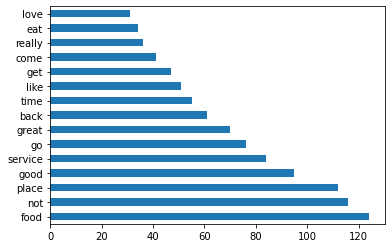

In [51]:
top_15_words.plot(kind = "barh")

In [52]:
#get top 10 postive word based on frquency

In [53]:
dataset

,Review,Liked
0,wow love place,1
1,crust not good,0
2,not tasty texture nasty,0
3,stop late may bank holiday rick steve recommen...,1
4,selection menu great price,1
...,...,...
995,think food flavor texture lack,0
996,appetite instantly go,0
997,overall not impress would not go back,0
998,whole experience underwhelming think well go n...,0


In [54]:
#dataset[dataset["Liked"] == 1]
#dataset.query("Liked == 1")

postive_para = " ".join(dataset[dataset["Liked"] == 1]["Review"])
 #-->joining only the positive reviews

In [55]:
pd.Series(postive_para.split()).value_counts().sort_values(ascending = False).head(20)

good          73
great         70
food          60
place         60
service       46
go            29
love          28
time          26
friendly      23
delicious     23
back          23
nice          22
best          22
really        22
amaze         21
like          20
also          18
not           18
come          18
restaurant    17
dtype: int64

In [56]:
negative_para = " ".join(dataset[dataset["Liked"] == 0]["Review"])
pd.Series(negative_para.split()).value_counts().sort_values(ascending = False).head(20)

not           98
food          64
place         52
go            47
back          38
service       38
get           34
like          31
time          29
wait          26
dont          25
come          23
never         22
eat           22
good          22
would         21
minutes       19
disappoint    19
ever          19
bad           18
dtype: int64

#### WordCloud

In [57]:
!pip install wordcloud

In [58]:
from wordcloud import WordCloud

In [59]:
# wc= WordCloud() ---or below parameters

In [60]:
wc = WordCloud( width=600,
    height=400,background_color='white', stopwords= [])

In [65]:
wc

In [66]:
word_count

{'wow': 3,
 'love': 31,
 'place': 112,
 'crust': 2,
 'not': 116,
 'good': 95,
 'tasty': 11,
 'texture': 3,
 'nasty': 3,
 'stop': 4,
 'late': 2,
 'may': 5,
 'bank': 1,
 'holiday': 1,
 'rick': 1,
 'steve': 1,
 'recommendation': 3,
 'selection': 10,
 'menu': 15,
 'great': 70,
 'price': 21,
 'get': 47,
 'angry': 1,
 'want': 17,
 'damn': 4,
 'pho': 6,
 'honeslty': 1,
 'didnt': 13,
 'taste': 22,
 'fresh': 14,
 'potatoes': 3,
 'like': 51,
 'rubber': 1,
 'could': 16,
 'tell': 9,
 'make': 26,
 'ahead': 1,
 'time': 55,
 'keep': 5,
 'warmer': 1,
 'fry': 16,
 'touch': 3,
 'service': 84,
 'prompt': 1,
 'would': 28,
 'go': 76,
 'back': 61,
 'cashier': 2,
 'care': 4,
 'ever': 28,
 'say': 26,
 'still': 11,
 'end': 4,
 'wayyy': 1,
 'overprice': 8,
 'try': 17,
 'cape': 1,
 'cod': 1,
 'ravoli': 1,
 'chicken': 17,
 'cranberrymmmm': 1,
 'disgust': 4,
 'pretty': 19,
 'sure': 8,
 'human': 2,
 'hair': 2,
 'shock': 1,
 'sign': 2,
 'indicate': 1,
 'cash': 1,
 'highly': 4,
 'recommend': 15,
 'waitress': 9,
 'lit

In [69]:
reviews_wc= wc.generate_from_frequencies(word_count)
#---> here we need to give word_count as parameter as it is a dictionary with counts of each word (key:value = word:freq )
# or below method without using count


#reviews_wc = wc.generate(para)

ValueError: Only supported for TrueType fonts

In [70]:
reviews_wc

NameError: name 'reviews_wc' is not defined

In [71]:
plt.imshow(reviews_wc)

NameError: name 'reviews_wc' is not defined

In [72]:
dataset

,Review,Liked
0,wow love place,1
1,crust not good,0
2,not tasty texture nasty,0
3,stop late may bank holiday rick steve recommen...,1
4,selection menu great price,1
...,...,...
995,think food flavor texture lack,0
996,appetite instantly go,0
997,overall not impress would not go back,0
998,whole experience underwhelming think well go n...,0


###### Count Vectorizer or Bag of words

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
cv = CountVectorizer()

#cv = CountVectorizer(max_features = 1500) ----> when u use this the X.shape will be  =(1000,1500)
# --> u can apply this in tf-idf also
# This is to : - limit the features
# other parameters that can be used: 
#        --- max_df: chks if a word's frequency is more than a particular threshold and remove the most common word from vocabulary.
#        --- min_df: chks if a word's frequency is less than a particular threshold and remove the least common word.

In [75]:
X = cv.fit_transform(dataset["Review"]).toarray()

In [76]:
X.shape

(1000, 1693)

In [77]:
cv.vocabulary_

{'wow': 1671,
 'love': 860,
 'place': 1115,
 'crust': 348,
 'not': 1000,
 'good': 630,
 'tasty': 1470,
 'texture': 1482,
 'nasty': 976,
 'stop': 1418,
 'late': 821,
 'may': 899,
 'bank': 98,
 'holiday': 712,
 'rick': 1246,
 'steve': 1412,
 'recommendation': 1211,
 'selection': 1303,
 'menu': 922,
 'great': 641,
 'price': 1151,
 'get': 616,
 'angry': 36,
 'want': 1610,
 'damn': 359,
 'pho': 1102,
 'honeslty': 715,
 'didnt': 399,
 'taste': 1468,
 'fresh': 591,
 'potatoes': 1142,
 'like': 843,
 'rubber': 1261,
 'could': 320,
 'tell': 1475,
 'make': 882,
 'ahead': 17,
 'time': 1506,
 'keep': 804,
 'warmer': 1612,
 'fry': 599,
 'touch': 1525,
 'service': 1314,
 'prompt': 1162,
 'would': 1668,
 'go': 625,
 'back': 89,
 'cashier': 229,
 'care': 221,
 'ever': 496,
 'say': 1288,
 'still': 1414,
 'end': 478,
 'wayyy': 1622,
 'overprice': 1046,
 'try': 1540,
 'cape': 217,
 'cod': 279,
 'ravoli': 1197,
 'chicken': 253,
 'cranberrymmmm': 333,
 'disgust': 420,
 'pretty': 1149,
 'sure': 1452,
 'human

In [78]:
cv.get_feature_names()

['absolute',
 'absolutely',
 'absolutley',
 'accident',
 'accommodations',
 'accomodate',
 'accordingly',
 'accountant',
 'ache',
 'acknowledge',
 'across',
 'actual',
 'actually',
 'add',
 'affordable',
 'afternoon',
 'ago',
 'ahead',
 'airline',
 'airport',
 'ala',
 'albondigas',
 'allergy',
 'almonds',
 'almost',
 'alone',
 'also',
 'although',
 'always',
 'amaze',
 'amazingrge',
 'ambiance',
 'ambience',
 'amount',
 'ample',
 'andddd',
 'angry',
 'another',
 'anticipate',
 'anymore',
 'anyone',
 'anything',
 'anytime',
 'anyway',
 'anyways',
 'apart',
 'apologize',
 'apology',
 'app',
 'appal',
 'apparently',
 'appeal',
 'appetite',
 'appetizer',
 'appetizers',
 'apple',
 'approval',
 'area',
 'arent',
 'arepas',
 'aria',
 'around',
 'array',
 'arrive',
 'article',
 'ask',
 'assure',
 'atmosphere',
 'atrocious',
 'attach',
 'attack',
 'attention',
 'attentive',
 'attitudes',
 'auju',
 'authentic',
 'average',
 'avocado',
 'avoid',
 'away',
 'awesome',
 'awful',
 'awkward',
 'awkwar

In [79]:
X = pd.DataFrame(X, columns = cv.get_feature_names())

In [80]:
X #features

,absolute,absolutely,absolutley,accident,accommodations,accomodate,accordingly,accountant,ache,acknowledge,...,yelpers,yet,youd,youll,youre,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
X["wow"]

0      1
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: wow, Length: 1000, dtype: int64

In [82]:
dataset

,Review,Liked
0,wow love place,1
1,crust not good,0
2,not tasty texture nasty,0
3,stop late may bank holiday rick steve recommen...,1
4,selection menu great price,1
...,...,...
995,think food flavor texture lack,0
996,appetite instantly go,0
997,overall not impress would not go back,0
998,whole experience underwhelming think well go n...,0


In [83]:
y = dataset["Liked"] #target variable

###### TF-IDF Vectorizer

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
tf_idf = TfidfVectorizer(ngram_range = (2 , 2) )
# ngram:no. of words- (1,2) will have single and double words
# tf_idf = TfidfVectorizer(max_df = int(len(dataset)*0.1)) --- avoiding the most common words 
# # tf_idf = TfidfVectorizer(min_df = 2) --> word in atleast 2 documents

In [86]:
X = tf_idf.fit_transform(dataset["Review"]).toarray()

In [87]:
tf_idf.vocabulary_

{'wow love': 4201,
 'love place': 2105,
 'crust not': 737,
 'not good': 2444,
 'not tasty': 2480,
 'tasty texture': 3682,
 'texture nasty': 3715,
 'stop late': 3554,
 'late may': 1959,
 'may bank': 2187,
 'bank holiday': 241,
 'holiday rick': 1739,
 'rick steve': 3093,
 'steve recommendation': 3536,
 'recommendation love': 3028,
 'selection menu': 3245,
 'menu great': 2236,
 'great price': 1613,
 'get angry': 1431,
 'angry want': 94,
 'want damn': 4024,
 'damn pho': 752,
 'honeslty didnt': 1746,
 'didnt taste': 840,
 'taste fresh': 3669,
 'potatoes like': 2842,
 'like rubber': 2025,
 'rubber could': 3119,
 'could tell': 695,
 'tell make': 3693,
 'make ahead': 2137,
 'ahead time': 21,
 'time keep': 3791,
 'keep warmer': 1922,
 'fry great': 1399,
 'great touch': 1625,
 'service prompt': 3324,
 'would not': 4190,
 'not go': 2443,
 'go back': 1488,
 'cashier care': 511,
 'care ever': 503,
 'ever say': 1081,
 'say still': 3203,
 'still end': 3540,
 'end wayyy': 1018,
 'wayyy overprice': 407

In [88]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
X.shape

(1000, 4238)

In [90]:
X = pd.DataFrame(X, columns = tf_idf.get_feature_names())

In [91]:
X #Features or Indeoendent Varaibles

,absolute must,absolutely amaze,absolutely back,absolutely clue,absolutely delicious,absolutely flatlined,absolutely flavor,absolutely star,absolutley fantastic,accident could,...,youre outrageously,youre serve,yukon gold,yum sauce,yum yum,yummy christmas,yummy try,yummy tummy,zero star,zero taste
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
X[["wow", "love","place","not","good"]]

KeyError: "None of [Index(['wow', 'love', 'place', 'not', 'good'], dtype='object')] are in the [columns]"

In [ ]:
y = dataset["Liked"]

In [ ]:
y #Target

### Split data into Train and test

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Building the ML Model

In [95]:
#Import the Model class
from sklearn.naive_bayes import GaussianNB

In [96]:
#Create a instance or object of the model

nb_model = GaussianNB()

In [97]:
# Train the ML Model -- Feed the data to the ML Algorithm

nb_model.fit(X_train, y_train)

GaussianNB()

In [98]:
#nb_model --- Trained model

### Prediction

In [99]:
X_test

,absolute must,absolutely amaze,absolutely back,absolutely clue,absolutely delicious,absolutely flatlined,absolutely flavor,absolutely star,absolutley fantastic,accident could,...,youre outrageously,youre serve,yukon gold,yum sauce,yum yum,yummy christmas,yummy try,yummy tummy,zero star,zero taste
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
y_pred = nb_model.predict(X_test)

In [101]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [102]:
y_test

507    0
818    0
452    0
368    1
242    0
      ..
430    0
874    0
550    1
608    1
207    0
Name: Liked, Length: 200, dtype: int64

### Evaluation

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
test_accuracy = accuracy_score(y_test, y_pred)

In [105]:
test_accuracy

0.62

In [106]:
print("Test Accuracy Score::", test_accuracy * 100, " %")

Test Accuracy Score:: 62.0  %


In [107]:
#
y_pred_train = nb_model.predict(X_train)

In [108]:
train_accuracy = accuracy_score(y_train, y_pred_train)

In [109]:
train_accuracy

0.98875

In [110]:
print("Train Accuracy Score::", train_accuracy * 100, " %")

Train Accuracy Score:: 98.875  %


### Real time prediction

In [111]:
new_words = []

In [112]:
review_new = "food is not good"

In [113]:
review_new = text_preprocessing(review_new)

In [114]:
review_new

'food not good'

In [115]:
# for word in review_new.split():
#     if word not in cv.vocabulary_:
#         with open("new_word.txt", "a") as f:      ### or new_word.append(word)
#             f.write(word + "\n")

In [116]:
# OR # review_new = cv.transform([review_new]).toarray()
review_new = tf_idf.transform([review_new]).toarray()

In [117]:
nb_model.predict(review_new)

array([0], dtype=int64)

In [118]:
nb_model.predict_proba(review_new)

array([[1., 0.]])

### Save the model

In [119]:
#or nb_model.bow = cv
nb_model.tf_idf = tf_idf  # dumping ur existing vectorizer into ur model object
                        # the model now has a cv/tf-idf object

In [120]:
import joblib

In [123]:
import os
os.getcwd()
os.chdir(r"d:\Users\NAME\Desktop\INNOMATICS\ASRA GITHUB - ML\Sentiment Analysis")

In [124]:
joblib.dump(nb_model, "sentiment_analysis_tfidf.pkl")

['sentiment_analysis_tfidf.pkl']